### LDA(Lineare Discriminant Analysis)
- 선형 판별 분석법
- 교재 415 페이지

### 라이브러리 불러오기

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터 전처리

In [4]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


In [15]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
lda_columns = ['lda_component_1', 'lda_component_2']
iris_df_lda = pd.DataFrame(iris_lda, columns = lda_columns)
iris_df_lda['target'] = iris.target

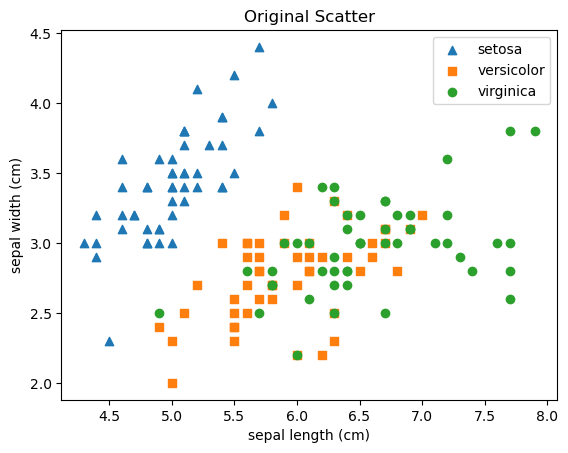

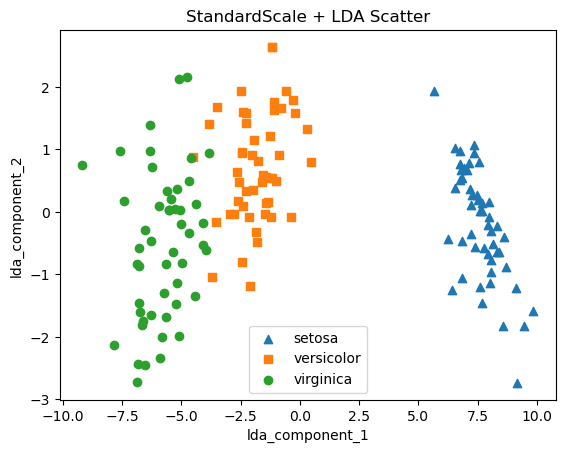

In [26]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y_axis = iris_df[iris_df['target'] == i]['sepal width (cm)']

    plt.scatter(
        x_axis
        , y_axis
        , marker = marker
        , label = iris.target_names[i]
    )

plt.title('Original Scatter')
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

for i, marker in enumerate(markers):
    x_axis_data = iris_df_lda[iris_df_lda['target'] == i]['lda_component_1']
    y_axis_data = iris_df_lda[iris_df_lda['target'] == i]['lda_component_2']

    plt.scatter(
                x_axis_data
                , y_axis_data
                , marker = marker
                , label = iris.target_names[i]
                )

plt.title('StandardScale + LDA Scatter')
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### SVD
- 데이터 압축에 효과적 > 대용량 데이터, 이미지 데이터에 활용됨

In [3]:
import numpy as np
from numpy.linalg import svd

In [4]:
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [6]:
U, sigma, Vt = svd(a)
print(U.shape, sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


In [7]:
print(f'''
▶ U matrix
{np.round(U, 3)}

▶ Sigma Value
{np.round(sigma, 3)}

▶ V transpose matrix
{np.round(Vt, 3)}
''')


▶ U matrix
[[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]

▶ Sigma Value
[3.423 2.023 0.463 0.079]

▶ V transpose matrix
[[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]



In [9]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
sigma_mat = np.diag(sigma)
a_ = np.dot(np.dot(U, sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [15]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [18]:
# 다시 SVD를 수행해 Sigma 값 확인
U, sigma, Vt = svd(a)
print(U.shape, sigma.shape, Vt.shape)
print(
f'''
Sigma Value
{np.round(sigma, 3)}
''')

(4, 4) (4,) (4, 4)

Sigma Value
[2.663 0.807 0.    0.   ]



In [19]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]

sigma_ = np.diag(sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, sigma.shape, Vt_.shape)

# U, sigma, vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, sigma_), Vt_)
print(np.round(a_, 3))


(4, 2) (4,) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [23]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print(f'''
▶ 원본행렬
{matrix}
''')

U, sigma, Vt = svd(matrix, full_matrices=False)
print(f'''
▶ 분해 행렬 차원
{U.shape, sigma.shape, Vt.shape}

▶ sigma값 행렬
{sigma}
'''
)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여, Truncated SVD 수행
num_components = 4
U_tr, sigma_tr, Vt_tr = svds(matrix, k = num_components)
print(f'''
▶ Truncated SVD 분해 행렬 차원
{U_tr.shape, sigma_tr.shape, Vt_tr.shape}

▶ Truncatd SVD sigma값 행렬
{sigma_tr}
      ''')

matrix_tr = np.dot(np.dot(U_tr, np.diag(sigma_tr)), Vt_tr) # output of Truncated SVD

print(f'''
▶ Truncated SVD로 분해 후 복원 행렬
{matrix_tr}
      ''')




▶ 원본행렬
[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]


▶ 분해 행렬 차원
((6, 6), (6,), (6, 6))

▶ sigma값 행렬
[3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


▶ Truncated SVD 분해 행렬 차원
((6, 4), (4,), (4, 6))

▶ Truncatd SVD sigma값 행렬
[0.55463089 0.83865238 0.88116505 3.2535007 ]
      

▶ Truncated SVD로 분해 후 복원 행렬
[[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.

Text(0, 0.5, 'pca_component_2')

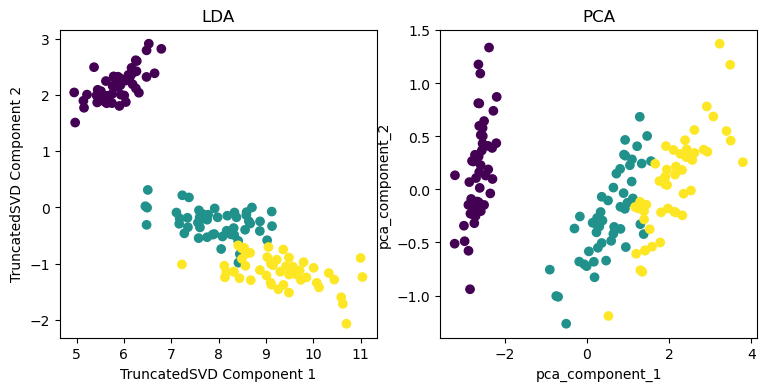

In [80]:
iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# PCA
pca_col = ['pca_component_1', 'pca_component_2']

pca = PCA(n_components=2)
pca.fit(iris_ftrs)
iris_pca = pca.transform(iris_ftrs)

iris_df_pca = pd.DataFrame(iris_pca, columns = pca_col)
iris_df_pca['target'] = iris.target

# 산점도 2차원으로 TrauncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
fig, (ax1, ax2) = plt.subplots(figsize= (9, 4), ncols = 2)
ax1.scatter(x = iris_tsvd[:, 0]
            , y = iris_tsvd[:, 1]
            , c = iris.target)

ax2.scatter(iris_pca[:, 0]
            , iris_pca[:, 1]
            , c = iris.target
            )

ax1.set_title('LDA')
ax1.set_xlabel('TruncatedSVD Component 1')
ax1.set_ylabel('TruncatedSVD Component 2')

ax2.set_title('PCA')
ax2.set_xlabel('pca_component_1')
ax2.set_ylabel('pca_component_2')


Text(0.5, 1.0, 'PCA Transformed')

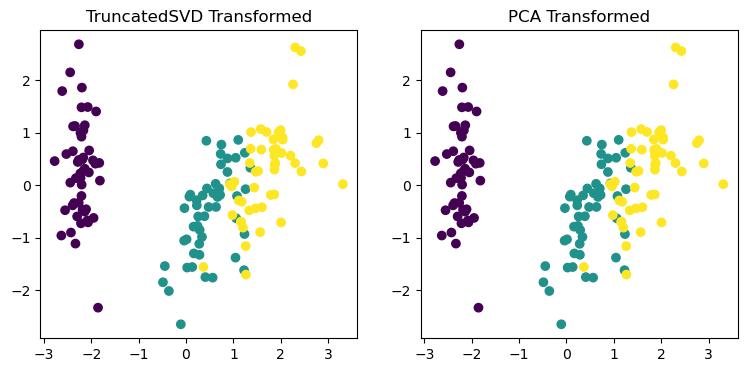

In [73]:
# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize = (9, 4), ncols =2)
ax1.scatter(x=iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
ax2.scatter(x=iris_pca[:, 0], y = iris_pca[:, 1], c = iris.target)
ax1.set_title('TruncatedSVD Transformed')
ax2.set_title('PCA Transformed')

### NMF

c:\Users\YJ\.conda\envs\xgboost_env\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\YJ\.conda\envs\xgboost_env\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

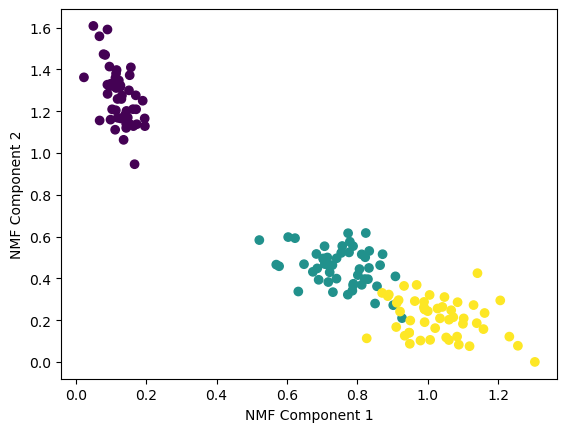

In [28]:
iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x = iris_nmf[:, 0]
            , y = iris_nmf[:, 1]
            , c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')


### 마무리